In [1]:
#IMPORTATION DE LA BASE DE DONNÉES

file_path <- "/Users/leogonin/Desktop/MASTER/M2 GRAF/MAUME/PROJET/Life Expectancy Data.csv"

data <- read.csv(file_path, header = TRUE, sep = ",", stringsAsFactors = FALSE)

head(data)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,...,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [2]:
library(randomForest)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [3]:
#SÉPARATION BASE TEST/ BASE ENTRAINEMENT
n <- nrow(data)
m =round( nrow(data)*0.25)

Indice_test <- sample(1:n, size = m, replace = FALSE)
Indice_test <- sort(Indice_test)
print(Indice_test)

  [1]    8   11   16   19   21   27   29   48   49   58   60   65   66   72   74
 [16]   80   81   86   89   94   99  100  101  102  105  106  118  120  121  133
 [31]  136  138  140  141  144  145  158  161  162  167  180  185  191  192  204
 [46]  207  211  213  215  216  220  221  227  240  241  246  249  257  262  269
 [61]  275  281  284  286  288  291  292  298  305  306  311  312  313  316  323
 [76]  324  326  327  329  334  335  338  342  343  345  358  360  367  372  381
 [91]  387  388  390  398  408  415  419  424  426  427  429  430  431  432  434
[106]  435  441  442  443  445  449  456  459  468  475  487  492  493  500  503
[121]  506  507  518  523  529  530  531  533  537  544  548  551  553  556  561
[136]  563  566  568  569  579  581  587  588  589  592  595  606  622  623  625
[151]  629  633  637  642  643  645  647  655  673  684  687  692  700  702  708
[166]  709  711  714  715  718  720  722  727  731  733  738  739  745  752  756
[181]  760  762  765  771  7

In [4]:
test_data <- data[Indice_test, ]
train_data <- data[-Indice_test, ]
train_data <- na.omit(train_data)
test_data <- na.omit(test_data)
cat("Nombre d'individus dans la base de test :", nrow(test_data), "\n")
cat("Nombre d'individus dans la base d'entrainement :", nrow(train_data), "\n")
head(test_data)
head(train_data)

Nombre d'individus dans la base de test : 411 
Nombre d'individus dans la base d'entrainement : 1238 


,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,...,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,1599,...,64,8.33,64,0.1,373.36112,2729431,18.8,18.9,0.433,8.7
11,Afghanistan,2005,Developing,57.3,291,85,0.02,1.388648,66,1296,...,58,8.70,58,0.1,25.29413,257798,19.3,19.5,0.396,7.9
16,Afghanistan,2000,Developing,54.8,321,88,0.01,10.424960,62,6532,...,24,8.20,24,0.1,114.56000,293756,2.3,2.5,0.338,5.5
19,Albania,2013,Developing,77.2,84,0,4.76,430.876979,99,0,...,99,5.66,99,0.1,4414.72314,289592,1.3,1.4,0.759,14.2
21,Albania,2011,Developing,76.6,88,0,5.37,437.062100,99,28,...,99,5.71,99,0.1,4437.17868,295195,1.4,1.5,0.738,13.3
27,Albania,2005,Developing,73.5,15,1,5.16,26.993121,98,6,...,97,6.12,98,0.1,279.14293,311487,1.8,1.8,0.685,10.8


,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,...,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [5]:

#MODÈLE CV

rf_model_1 <- randomForest(Life.expectancy ~ Country + infant.deaths + Alcohol + BMI + GDP + percentage.expenditure, 
                           data = train_data, 
                           ntree = 500,  
                           mtry = 3,     
                           importance = TRUE)

# Affichage des résultats du modèle
print(rf_model_1)

# Prédictions sur les données de test
predictions <- predict(rf_model_1, newdata = test_data)

# Calcul de l'erreur quadratique moyenne (MSE)
mse <- mean((predictions - test_data$Life.expectancy)^2)
print(paste("MSE:", mse))
print(paste("RMSE:", sqrt(mse)))



Call:
 randomForest(formula = Life.expectancy ~ Country + infant.deaths +      Alcohol + BMI + GDP + percentage.expenditure, data = train_data,      ntree = 500, mtry = 3, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 11.72063
                    % Var explained: 84.68
[1] "MSE: 13.8776609552554"
[1] "RMSE: 3.72527327256074"



Call:
 randomForest(formula = Life.expectancy ~ Country + infant.deaths +      Alcohol + BMI + GDP + percentage.expenditure, data = data,      ntree = 500, mtry = 3, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 8.757918
                    % Var explained: 88.68
[1] "MSE OOB: 8.757918255112"
[1] "RMSE 2.9593780182856"


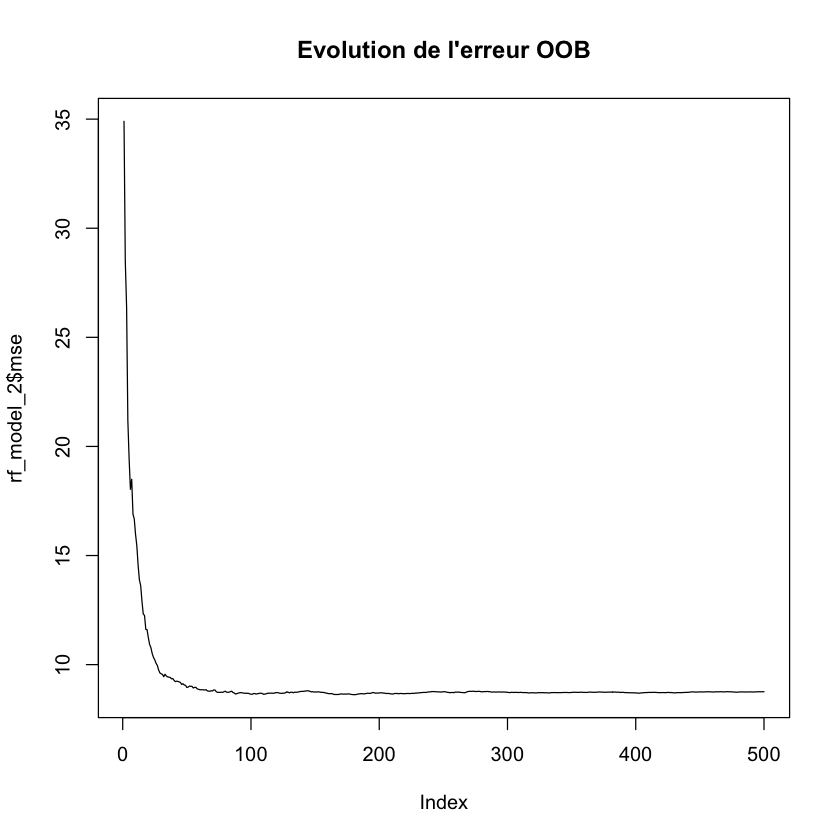

In [7]:
#MODÈLE OOB


data=na.omit(data)
rf_model_2 <- randomForest(Life.expectancy ~ Country + infant.deaths + Alcohol + BMI + GDP + percentage.expenditure, 
                           data = data, 
                           ntree = 500,  
                           mtry = 3,     
                           importance = TRUE)

print(rf_model_2)

oob_predictions <- rf_model_2$predicted
oob_mse <- mean((data$Life.expectancy - oob_predictions)^2)
print(paste("MSE OOB:", oob_mse))
print(paste("RMSE", sqrt(oob_mse)))

plot(rf_model_2$mse,type ="l" ,main = "Evolution de l'erreur OOB")



